<a href="https://colab.research.google.com/github/reo113/pythonprojects-microcred2022/blob/main/machineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv")


In [ ]:
data = data.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


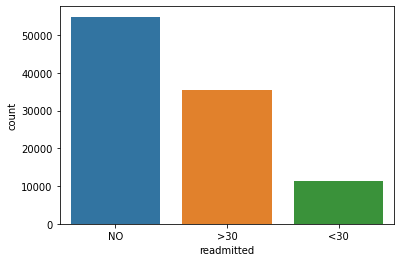

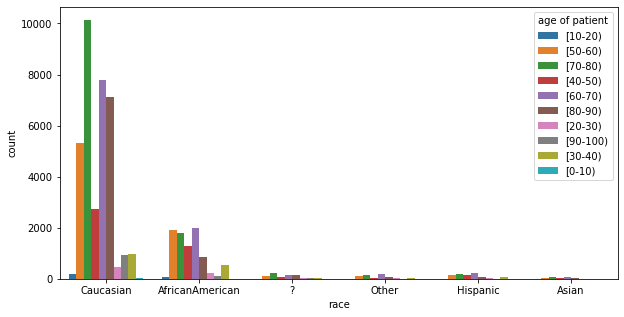

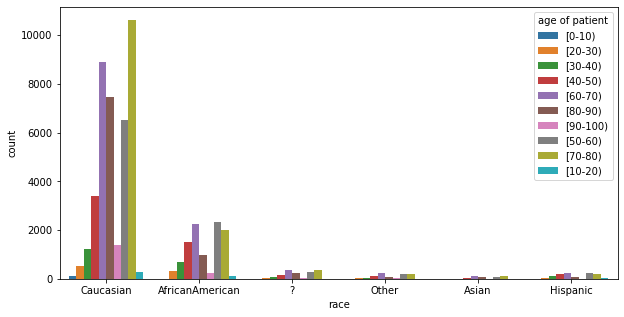

In [ ]:
#eda
readmit = data[data["readmitted"]!="NO"]
No_readmit = data[data["readmitted"] == "NO"]

sns.countplot(data["readmitted"])
plt.figure(figsize=(10,5))

sns.countplot(x ="race", data=readmit, hue ="age")
plt.legend(loc ="upper right",title="age of patient")

plt.figure(figsize=(10,5))

sns.countplot(x ="race", data=No_readmit, hue ="age")
plt.legend(loc ="upper right",title="age of patient")

In [ ]:
#data cleaning
df_knn =data.drop(data.columns[10:31], axis=1)
df_knn

#tyrty

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#drop columns and create dummy columns for each remaining
df_knn.drop(['race','gender','age','weight','encounter_id','change','diabetesMed','examide','citoglipton','encounter_id','patient_nbr','readmitted'], axis=1, inplace=True)
df_knn= pd.get_dummies(data=df_knn, columns=['glyburide','tolbutamide','pioglitazone',	'rosiglitazone',	'acarbose',	'miglitol'	,'troglitazone',
                                             'tolazamide'	,'insulin','glyburide-metformin',	'glipizide-metformin'	,
                                             'glimepiride-pioglitazone',	'metformin-rosiglitazone','metformin-pioglitazone',
                                             	])


In [ ]:
df_knn = df_knn.drop(['admission_source_id','discharge_disposition_id','admission_type_id'], axis=1)


In [ ]:
df_knn

,time_in_hospital,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady
0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
1,3,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0
2,2,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,2,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0
4,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
101762,5,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
101763,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
101764,10,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0


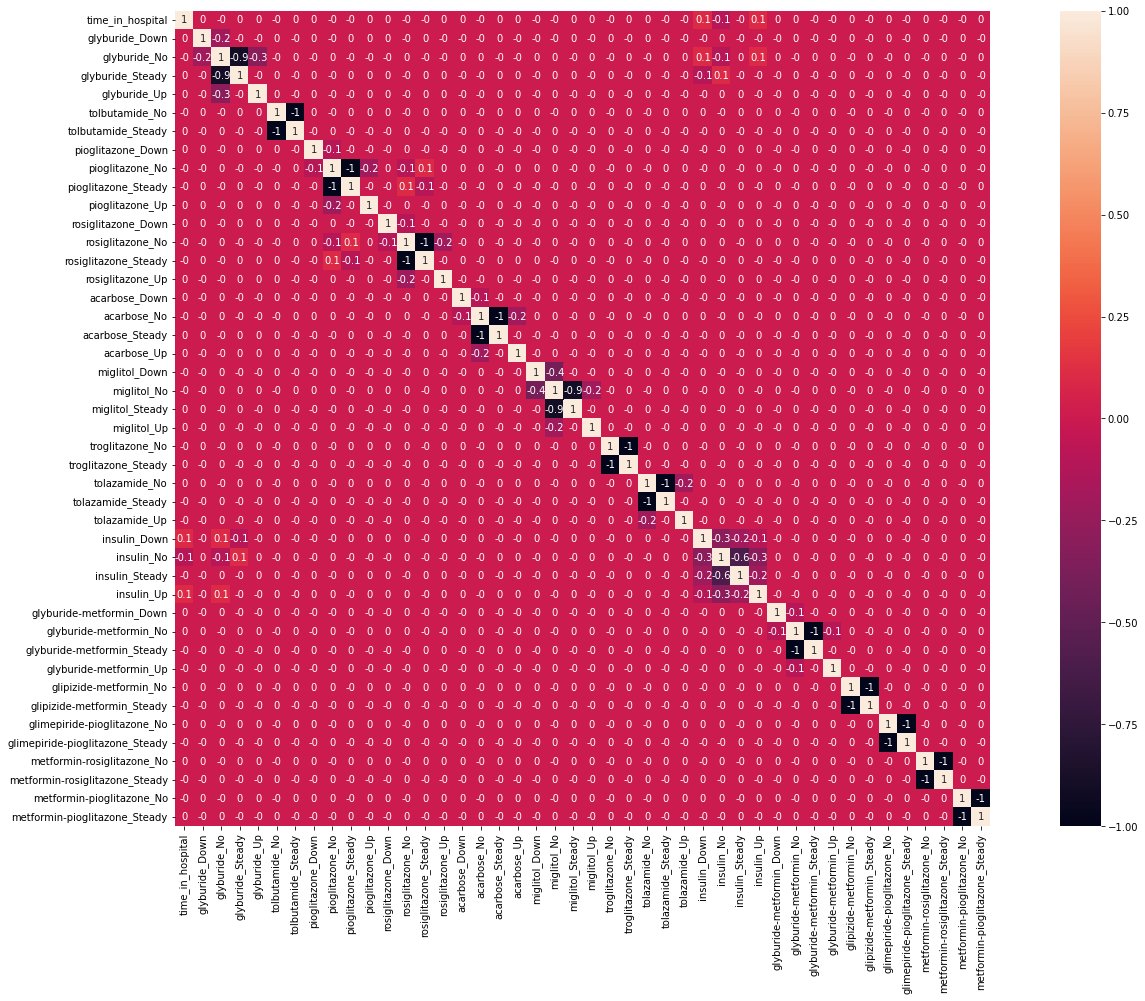

In [ ]:
#Create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = df_knn.corr().round(1)
plt.figure(figsize =(25,15))
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2g", square = True, )

In [ ]:
x_features = df_knn
y_target = df_knn["time_in_hospital"]




In [ ]:
#linear model
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(x_features,y_target)

LinearRegression()

In [ ]:
print('the estimated intercept %.2f '%lineReg.intercept_)
print('the coefficient is %d ' %len(lineReg.coef_))

the estimated intercept -0.00 
the coefficient is 44 


In [ ]:
#MODEL TRAINING
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_features,y_target)

print(x_features.shape)

lineReg.fit(X_train,Y_train)

(101766, 44)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for testing set
y_train_predict = lineReg.predict(X_train)

# root mean square error of the model
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

# r-squared score of the model
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.817857924378977e-15
R2 score is 1.0




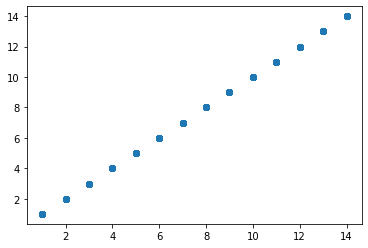

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

In [ ]:

#data cleaning
df_data =data.drop(["encounter_id","patient_nbr",],axis =1)

df_data =df_data.drop(data.columns[15:48], axis=1)

#for race
race_dummies = pd.get_dummies(df_data['race'],)
df_data.drop(['race'], axis=1, inplace=True)
df_data_new = pd.concat([df_data,race_dummies],axis=1)


#for gender
gender_dummies = pd.get_dummies(df_data['gender'],)
df_data_new.drop(['gender'], axis=1, inplace=True)
df_data_new = pd.concat([df_data_new,gender_dummies],axis=1)

#for age
#age_dummies = pd.get_dummies(df_data['age'],)
#df_data_new.drop(['age'], axis=1, inplace=True)
#df_data_new= pd.concat([df_data_new,age_dummies],axis=1)

#for diabetes
#diaMeds_dummies = pd.get_dummies(df_data['diabetesMed'],prefix="diabetesMed")
#df_data_new.drop(['diabetesMed'], axis=1, inplace=True)
#df_data_new = pd.concat([df_data_new,diaMeds_dummies],axis=1)

# for readmit
readmit_dummies = pd.get_dummies(df_data['readmitted'],prefix ="readmitted" )
df_data_new.drop(['readmitted'], axis=1, inplace=True)
df_data_new = pd.concat([df_data_new,readmit_dummies],axis=1)

df_data_new = df_data_new.drop(["diabetesMed","age","Unknown/Invalid","weight","admission_type_id","discharge_disposition_id","admission_source_id","payer_code", "medical_specialty"], axis=1)
df_2 = df_data_new.drop(['?', "Other"], axis =1)

In [ ]:
df_2

In [ ]:
#standardizes the data by subtracting the mean and then scaling to unit variance.(Unit variance means dividing all the values by the standard deviation)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(df_2.drop('Hispanic', axis=1))
scaled_features =scalar.transform(df_2.drop('Hispanic', axis =1))
df_kmm_features = pd.DataFrame(scaled_features, columns = df_2.columns[:-1])


In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2  = train_test_split(scaled_features, df_2['Hispanic'], test_size =.3)

# gathering data for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train2,y_train2)
predict2 = knn.predict(X_test2)
predict2


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
# matrix compares the actual target values with those predicted by the machine learning model.
from sklearn.metrics import  classification_report, confusion_matrix
print(confusion_matrix(y_test2,predict2))


[[29500   421]
 [  378   231]]


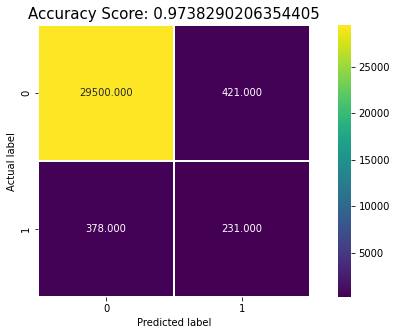

In [ ]:
#displaying confusin matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test2, predict2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test2, y_test2))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(y_test2,predict2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29921
           1       0.35      0.38      0.37       609

    accuracy                           0.97     30530
   macro avg       0.67      0.68      0.68     30530
weighted avg       0.97      0.97      0.97     30530



In [ ]:
#module implements several loss, score, and utility functions to measure classification performance
from sklearn import metrics

score =[]

for i in range(1,40):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(X_train2, y_train2)
  y_pred = knn2.predict(X_test2)
  score.append(metrics.accuracy_score(y_test2,y_pred))

print(score)

[0.9738290206354405, 0.9777595807402555, 0.9756305273501474, 0.9781853914182771, 0.9773992793973141, 0.9783164100884376, 0.9778578447428758, 0.9785129380936783, 0.9781853914182771, 0.9790697674418605, 0.9784474287585981, 0.9785456927612185, 0.9777923354077956, 0.9781526367507369, 0.9777595807402555, 0.9784801834261382, 0.9778578447428758, 0.9789387487717, 0.9780871274156567, 0.9790042581067803, 0.9785456927612185, 0.9792990501146414, 0.9785456927612185, 0.9791680314444808, 0.9791680314444808, 0.9792990501146414, 0.9789059941041598, 0.9791352767769407, 0.9787422207664592, 0.9793318047821815, 0.9787749754339994, 0.9792990501146414, 0.9790370127743203, 0.9794628234523419, 0.9792990501146414, 0.9795283327874222, 0.9794628234523419, 0.9795938421225024, 0.9794300687848019]


Text(0, 0.5, 'Testing Accuracy')

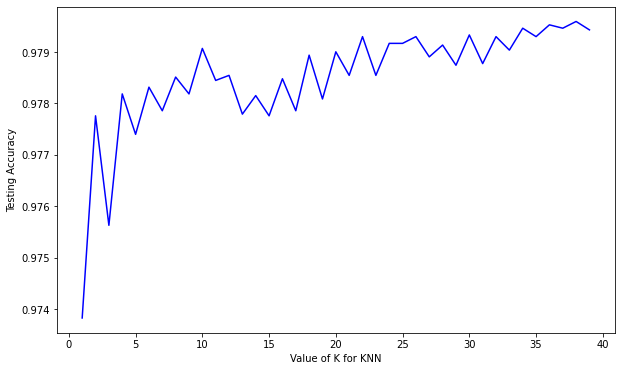

In [ ]:
#plotting accuracy score with the k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Error Rate')

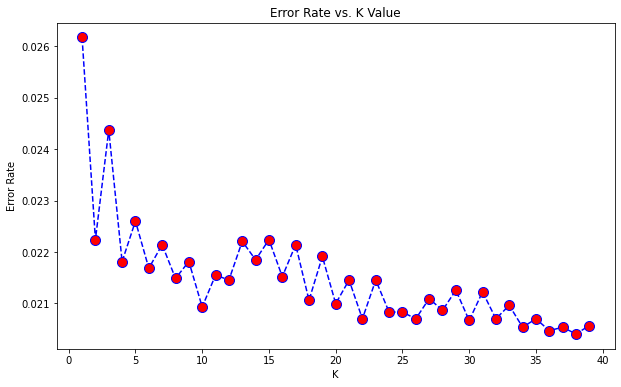

In [ ]:
# calculate the mean of error for all the predicted values where K ranges from 1 and 40.
#executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.
error_rate = []
for i in range(1,40):
    
    knn3 = KNeighborsClassifier(n_neighbors=i)
    knn3.fit(X_train2,y_train2)
    pred_i = knn3.predict(X_test2)
    error_rate.append(np.mean(pred_i != y_test2))



#plotting error vate to k value

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')